# Inteligentná analýza údajov - časť Predspracovanie
## Dataset 82
#### Martin Budinský, Ivana Baleková <br/>
Podiel práce každého z dvojice: 50%

In [385]:
%matplotlib inline

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#### Nastavenie pandas

Takisto ako pri prieskumnej analýze si nastavíme pandas aby zobrazoval všetky stĺpce datasetu a tiež aby zobrazil celé hodnoty atribútov.

In [387]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 1000000)

#### Načítanie datasetov

In [388]:
personal_train_data = pd.read_csv('datasets/personal_train.csv', index_col=0)

personal_train_data.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05


In [389]:
other_train_data = pd.read_csv('datasets/other_train.csv', index_col=0)

other_train_data.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Edward Woodard,"9976 Perez Trail Apt. 273\r\nDavidport, NC 80553",Black,Never-married,Other_service,f,9.0,Not-in-family,-0.231075,134.6640625,0.0,0.002102,HS-grad,180283.0,0.0,49.792111,<=50K,"{'mean_oxygen':'6.162207358','std_oxygen':'27.43869012','kurtosis_oxygen':'5.1160153180000005','skewness_oxygen':'28.79016775'}",United-States,40.0,0.0,State-gov
1,Hassan Friedman,"7145 Aaron Village Apt. 294\r\nRoweville, DE 73399",White,Married-civ-spouse,Exec-managerial,f,10.0,Husband,0.540982,113.0625,0.0,0.231768,Some-college,195891.0,0.0,42.812226,<=50K,"{'mean_oxygen':'1.731605351','std_oxygen':'11.76252074','kurtosis_oxygen':'11.96483676','skewness_oxygen':'203.0902438'}",United-States,45.0,0.0,Self-emp-not-inc
2,Edward Holt,Unit 8332 Box 5963\r\nDPO AA 41759,White,Married-civ-spouse,Craft-repair,f,9.0,Husband,12.393969,66.78125,0.0,2.623626,HS-grad,383493.0,1.0,32.658254,>50K,"{'mean_oxygen':'14.80852843','std_oxygen':'46.38263458','kurtosis_oxygen':'3.617249692','skewness_oxygen':'12.61488438'}",United-States,60.0,0.0,Self-emp-inc
3,Jose Miers,"38872 Burgess Neck Suite 666\r\nEmilyhaven, CT 68650",White,Married-civ-spouse,Sales,f,9.0,Wife,1.241507,111.4921875,0.0,0.417373,HS-grad,276218.0,0.0,37.794055,>50K,"{'mean_oxygen':'0.905518395','std_oxygen':'10.69109918','kurtosis_oxygen':'16.46840703','skewness_oxygen':'325.1141341'}",United-States,40.0,0.0,Private
4,Jay Wells,"063 Day Flats\r\nJudymouth, FL 61565",Black,Separated,Other-service,f,9.0,Not-in-family,-0.252255,\tnan,0.0,0.032944,HS-grad,73091.0,0.0,47.355369,<=50K,"{'mean_oxygen':'3.772575251','std_oxygen':'19.14934573','kurtosis_oxygen':'6.289634408','skewness_oxygen':'47.73565619'}",United-States,50.0,1876.0,Self-emp-not-inc


#### Spojenie datasetov

Takisto ako pri prieskumnej analýze si spojíme 2 datasety do jedného. Datasety spájame cez stĺpce name a address

In [390]:
train_data = personal_train_data.merge(other_train_data, on=['name', 'address'], how='outer')

train_data.head()

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",India,40.0,0.0,Private
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",United-States,35.0,0.0,Self-emp-not-inc
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",United-States,40.0,0.0,?
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",United-States,99.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",United-States,20.0,0.0,Private


#### Transformácia stĺpca medical_info na 4 nové stĺpce

V prieskumnej analýze sme si všimli, že v dátach sa nachádza atribút medical_info, v ktorom sú ,,zabalené" 4 atribúty týkajúce sa hodnôt kyslíka v krvi pacienta. Ideme tento stĺpec teda transformovať na 4 nové stĺpce.

Ideme zistiť, či stĺpec medical_info obsahuje aj nejaké prázdne hodnoty.

In [391]:
train_data['medical_info'].isnull().sum()

9

Zistili sme, že v tomto stĺpci sa nachádza prázdna hodnota 9-krát.

Zobrazíme si záznamy s prázdnou hodnotou v tomto stĺpci

In [392]:
train_data[train_data['medical_info'].isnull()]

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
652,Oscar Brown,"8782 Holly Hill\r\nDanielview, WA 07092",45,Male,1974-08-31 00 00 00,Other,Never-married,Exec-managerial,NaN,10.0,Own-child,3.332666,NaN,0.0,1.188255,Some-college,NaN,1.0,41.188517,<=50K,NaN,Peru,24.0,0.0,Private
692,Joshua Perea,"346 Brian Stravenue Apt. 259\r\nNew Bethany, CO 67776",67,Male,1951-12-03,White,Never-married,Exec-managerial,f,9.0,Not-in-family,5.286094,70.2578125,0.0,1.753980,HS-grad,193689.0,1.0,41.918680,<=50K,NaN,NaN,65.0,0.0,Self-emp-not-inc
1227,Stephen Anderson,"8628 Morales Track Suite 662\r\nElizabethview, NC 92486",38,Male,1981-07-08,White,Never-married,Sales,NaN,10.0,Unmarried,0.340625,115.3359375,0.0,NaN,Some-college,NaN,0.0,45.238479,<=50K,NaN,United-States,40.0,0.0,Private
1519,Glen Edwards,"94418 Thomas Turnpike Suite 514\r\nNorth Eugene, AR 59529",43,Female,29/06/1976,Black,Never-married,?,t,10.0,NaN,2.713387,79.984375,NaN,1.049539,Some-college,317780.0,0.0,37.289196,<=50K,NaN,United-States,40.0,0.0,?
1697,John Ruffin,"03602 Daniels Villages Suite 661\r\nRayland, MO 34511",56,Male,1963-02-01,White,Never-married,Handlers-cleaners,f,9.0,Other-relative,-0.282879,126.8359375,0.0,-0.148753,HS-grad,81528.0,0.0,51.715384,<=50K,NaN,United-States,60.0,NaN,NaN
3043,George Trevino,"122 Antonio Cliff\r\nLewisview, NJ 68979",86,Female,1932/11/15,White,Married-civ-spouse,Prof-specialty,f,14.0,Wife,9.414610,30.8359375,0.0,3.119980,Masters,42972.0,1.0,48.742752,>50K,NaN,United-States,22.0,0.0,Private
3183,John Peno,"54278 Patterson Cliffs Apt. 914\r\nSandersfurt, GA 35863",61,Female,16/12/1957,White,Never-married,NaN,NaN,6.0,Own-child,0.080335,144.3515625,0.0,-0.287338,10th,36877.0,0.0,50.928502,<=50K,NaN,United-States,10.0,NaN,Private
3438,Wayne Pullen,"02705 Sheila Shoals Suite 800\r\nMichelleberg, KY 63437",47,Male,1972-01-31,White,Married-civ-spouse,Machine-op-inspct,f,9.0,NaN,0.403507,??\r\r\n,0.0,0.466374,HS-grad,NaN,0.0,49.284603,<=50K,NaN,United-States,40.0,0.0,Private
3487,Jesse Huether,"1063 Erin Fall Apt. 593\r\nAllentown, ID 88019",64,Female,1955-07-15,White,Divorced,Prof-specialty,f,16.0,Unmarried,-0.361904,118.1640625,25236.0,-0.055119,Doctorate,NaN,0.0,4873.457726,>50K,NaN,NaN,65.0,0.0,Private


Keďže nie je dobrým zvykom meniť dáta priamo v originálnom datasete, vytvoríme si nový dataset, ktorý obsahuje iba stĺpec medical_info. Práve v  tomto ,,pomocnom" datasete budeme robiť už vyššie spomínanú transformáciu.

In [393]:
medical_info_df = train_data[['medical_info']].dropna()

medical_info_df

,medical_info
0,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}"
1,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}"
2,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}"
3,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}"
4,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}"
...,...
3978,"{'mean_oxygen':'1.997491639','std_oxygen':'18.64962525','kurtosis_oxygen':'10.59525135','skewness_oxygen':'118.2226386'}"
3979,"{'mean_oxygen':'18.72826087','std_oxygen':'47.50089495','kurtosis_oxygen':'3.116141164','skewness_oxygen':'9.737623197000001'}"
3980,"{'mean_oxygen':'1.7959866219999998','std_oxygen':'17.55064865','kurtosis_oxygen':'10.52891651','skewness_oxygen':'115.8816543'}"
3981,"{'mean_oxygen':'1.242474916','std_oxygen':'15.22643149','kurtosis_oxygen':'13.50540919','skewness_oxygen':'193.8022286'}"


Keďže sme odstránili záznamy s prázdnou hodnotou v stĺpci medical_info, náš pomocný dataset obsahuje 3974 záznamov. Indexy zostali zachované z pôvodného datasetu, keďže ako môžeme vidieť najvyšší index je 3982, napriek tomu že pomocný dataset obsahuje o 9 záznamov menej.

Ideme si napísať metódu, ktorá vytiahne zo stĺpca medical_info hodnoty 4 nových atribútov a upraví ich do vhodného formátu.

In [394]:
def process_medical_info_col(medical_info):
    medical_info = medical_info.strip("{}")
    cols = medical_info.split(",")
    values = [col.split(':')[1] for col in cols]
    stripped_values = [value.strip("'") for value in values]

    return pd.Series(stripped_values)

In [395]:
medical_info_df[['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']] = medical_info_df.medical_info.apply(process_medical_info_col)
medical_info_df.head()

,medical_info,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",163.5769231,45.86972539999999,-0.180266075,-0.464227987
1,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",9.899665552,37.31527479,4.086775553,16.784358800000003
2,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",3.258361204,22.6477159,8.108096424,70.22644286
3,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",0.644648829,10.91614342,20.50089209,449.2782643
4,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",1.191471572,9.935542807000001,16.58796639,371.4528926


Ako môžeme vidieť, transformácia stĺpca medical_info bola úspešná a podarilo sa nám vytvoriť 4 nové atribúty.

Teraz môžeme pripojiť pomocný dataset s novými stĺpcami k pôvodnému.

In [396]:
train_data = train_data.merge(medical_info_df, how='outer', left_index=True, right_index=True)

train_data

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info_x,native-country,hours-per-week,capital-loss,workclass,medical_info_y,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",India,40.0,0.0,Private,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",163.5769231,45.86972539999999,-0.180266075,-0.464227987
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",United-States,35.0,0.0,Self-emp-not-inc,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",9.899665552,37.31527479,4.086775553,16.784358800000003
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",United-States,40.0,0.0,?,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",3.258361204,22.6477159,8.108096424,70.22644286
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",United-States,99.0,0.0,Private,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",0.644648829,10.91614342,20.50089209,449.2782643
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",United-States,20.0,0.0,Private,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",1.191471572,9.935542807000001,16.58796639,371.4528926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",58,Female,1960/11/26,Asian-Pac-Islander,Never-married,Prof-specialty,f,14.0,Not-in-family,0.251673,NaN,0.0,0.099653,Masters,285102.0,0.0,45.488449,>50K,"{'mean_oxygen':'1.997491639','std_oxygen':'18.64962525','kurtosis_oxygen':'10.59525135','skewness_oxygen':'118.2226386'}",Taiwan,40.0,0.0,Private,"{'mean_oxygen':'1.997491639','std_oxygen':'18.64962525','kurtosis_oxygen':'10.59525135','skewness_oxygen':'118.2226386'}",1.997491639,18.64962525,10.59525135,118.2226386
3979,William Pope,"68430 Erik Terrace Suite 279\r\nPort Adamborough, WV 73101",58,Male,1961-07-28,White,Married-civ-spouse,?,f,9.0,Husband,27.058807,35.3515625,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,"{'mean_oxygen':'18.72826087','std_oxygen':'47.500894

Vidíme, že v dátach nám ostali ešte pôvodné medical_info stĺpce. Ideme ich teda odstrániť, keďže ich už nepotrebujeme.

In [397]:
train_data.drop(['medical_info_x', 'medical_info_y'], axis=1, inplace=True)

train_data

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,India,40.0,0.0,Private,163.5769231,45.86972539999999,-0.180266075,-0.464227987
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,United-States,35.0,0.0,Self-emp-not-inc,9.899665552,37.31527479,4.086775553,16.784358800000003
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,United-States,40.0,0.0,?,3.258361204,22.6477159,8.108096424,70.22644286
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,United-States,99.0,0.0,Private,0.644648829,10.91614342,20.50089209,449.2782643
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,United-States,20.0,0.0,Private,1.191471572,9.935542807000001,16.58796639,371.4528926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",58,Female,1960/11/26,Asian-Pac-Islander,Never-married,Prof-specialty,f,14.0,Not-in-family,0.251673,NaN,0.0,0.099653,Masters,285102.0,0.0,45.488449,>50K,Taiwan,40.0,0.0,Private,1.997491639,18.64962525,10.59525135,118.2226386
3979,William Pope,"68430 Erik Terrace Suite 279\r\nPort Adamborough, WV 73101",58,Male,1961-07-28,White,Married-civ-spouse,?,f,9.0,Husband,27.058807,35.3515625,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,United-States,25.0,0.0,?,18.72826087,47.50089495,3.116141164,9.737623197000001
3980,Jared Kinsey,Unit 8416 Box 3801\r\nDPO AE 31166,67,Male,1952-04-11,White,Married-civ-spouse,Exec-managerial,f,16.0,Husband,1.807447,??,0.0,0.726491,Doctorate,50164.0,0.0,38.616453,>50K,United-States,60.0,0.0,Private,1.7959866219999998,17.55064865,10.52891651,115.8816543
3981,Frederick Lawley,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",62,Male,1956-12-14,Black,Never-married,Farming-fishing,f,9.0,Own-child,0.613960,116.9765625,0.0,0.129173,HS-grad,124187.0,0.0,41.616828,<=50K,United-States,60.0,0.0,Private,1.242474916,15.22643149,13.50540919,193.8022286


Ideme si pozrieť informácie o upravenom datasete.

In [398]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3970 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3404 non-null   object 
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


Vidíme, že novovytvorené stĺpce sú typu object hoci ide o číselné hodnoty.

Ideme teda pretypovať nové stĺpce na float64.

In [399]:
train_data = train_data.astype({'mean_oxygen': 'float64', 'std_oxygen': 'float64', 'kurtosis_oxygen': 'float64',
                                'skewness_oxygen': 'float64'})

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3970 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3404 non-null   object 
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


#### Pretypovanie stĺpca mean_glucose - 1. pokus

V prieskumnej analýze sme spozorovali, že atribút mean_glucose je typu object, hoci tiež ide o numerický atribút.

Ideme teda skúsiť pretypovať tento atribút.

In [400]:
train_data = train_data.astype({'mean_glucose': 'float64'})

train_data.info()

ValueError: could not convert string to float: '??'

Vidíme, že pretypovanie momentálne nie je možné, keďže sa v stĺpci nachádza hodnota '??'. Zrejme ide o prázdnu hodnotu.

Zobrazíme si záznamy s hodnotou '??' v stĺpci mean_glucose.

In [401]:
train_data[train_data['mean_glucose'] == '??']

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
15,Kurt Littlefield,"822 Wilson Meadow\r\nMitchellmouth, RI 05935",27,Male,1992-08-13,White,Married-civ-spouse,Tech-support,f,10.0,Husband,-0.296756,??,0.0,0.162241,Some-college,158746.0,0.0,51.980023,<=50K,United-States,40.0,0.0,Private,3.361204,20.593696,9.086200,92.082643
36,Elmer King,"29688 Lindsey Dale Suite 077\r\nNorth Cassandra, PA 31881",52,Male,1967-01-02,White,Married-civ-spouse,Sales,f,10.0,Husband,-0.400658,??,0.0,0.141863,Some-college,111675.0,0.0,51.695198,<=50K,United-States,43.0,0.0,Private,1.832776,17.559706,10.530075,117.131775
42,Stephen Genova,"512 Duffy Lakes\r\nAlexmouth, WY 86476",65,Male,1954-06-12,White,Never-married,Farming-fishing,f,10.0,Own-child,3.693909,??,0.0,1.348453,Some-college,164658.0,1.0,44.202718,<=50K,United-States,60.0,0.0,Self-emp-inc,11.954013,44.688970,3.864756,14.077335
64,Pedro Sayle,"8864 Taylor Shoal\r\nStevenhaven, WA 77253",39,Female,1980-05-23,White,Divorced,Other-service,f,9.0,Not-in-family,-0.143556,??,0.0,0.027845,HS-grad,80430.0,0.0,48.810477,<=50K,United-States,40.0,0.0,Private,1.697324,15.626665,11.050048,135.954574
92,Robert Killinger,"09437 Diana Ford Apt. 873\r\nDelgadoside, AK 71380",51,Male,1968-06-28,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,33.626620,??,0.0,5.727785,Bachelors,229651.0,1.0,-3271.276509,>50K,United-States,50.0,0.0,Local-gov,98.836120,70.274782,0.603461,-0.497939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,Todd Longie,"09050 Phillips Wells Apt. 538\r\nRileymouth, NV 46699",48,Male,71-08-01,White,Never-married,Craft-repair,f,14.0,Not-in-family,-0.503301,??,0.0,0.139425,Masters,204527.0,0.0,53.586151,>50K,United-States,50.0,0.0,Private,32.605351,54.603693,1.977399,4.032597
3881,Matthew Anderson,"0892 Rivera Plain Suite 387\r\nSouth Brooke, NH 56488",64,Female,1955/01/10,Black,Widowed,Other-service,f,9.0,Other-relative,-0.475104,??,0.0,-0.108507,HS-grad,217210.0,0.0,49.763125,<=50K,United-States,40.0,0.0,Self-emp-not-inc,3.980769,21.231141,6.989964,55.284893
3930,John Casares,Unit 2369 Box 4871\r\nDPO AA 98117,60,Male,09/12/1958,White,Married-civ-spouse,NaN,f,8.0,Husband,0.038068,??,0.0,0.162843,12th,83704.0,0.0,48.537376,<=50K,NaN,NaN,0.0,Private,1.535117,13.055885,12.880652,200.733856
3931,John Casares,Unit 2369 Box 4871\r\nDPO AA 98117,60,Male,09/12/1958,White,Married-civ-spouse,Craft-repair,NaN,8.0,NaN,0.038068,??,0.0,0.162843,12th,83704.0,0.0,48.537376,<=50K,NaN,40.0,0.0,Private,1.535117,13.055885,12.880652,200.733856


Až 124 záznamov obsahuje hodnotu '??' v stĺpci mean_glucose.

## Zjednotenie formátu prázdnych hodnôt

V prieskumnej analýze sme si všimli, že viacero atribútov obsahuje podobné ,,otáznikové" hodnoty. Ideme teda tento problém vyriešiť pre všetky atribúty, ktorých sa to týka.

Tiež sme si všimli že ,,otáznikové" ale aj niektoré hodnoty kategorických atribútov obsahujú nadbytočné whitespace znaky. Ideme teda pre istotu očistiť hodnoty všetkých atribútov typu object od takýchto nadbytočných znakov.

In [402]:
train_data_obj = train_data.select_dtypes(['object'])
train_data[train_data_obj.columns] = train_data_obj.apply(lambda x: x.str.strip())

train_data['occupation'].unique()

array(['Adm-clerical', 'Other-service', '?', 'Prof-specialty',
       'Transport-moving', 'Exec-managerial', nan, 'Sales',
       'Tech-support', 'Prof_specialty', 'Craft-repair',
       'Handlers-cleaners', 'Farming-fishing', 'Protective-serv',
       'Armed-Forces', 'Machine-op-inspct', 'Other_service',
       'Exec_managerial', 'Adm_clerical', 'Craft_repair',
       'Transport_moving', 'Machine_op_inspct', 'Protective_serv',
       'Farming_fishing', 'Handlers_cleaners', 'Tech_support',
       'Priv-house-serv', 'Priv_house_serv'], dtype=object)

Zdá sa že očistenie hodnôt prebehlo úspešne, keďže v stĺpci occupation sa pôvodne nachádzali hodnoty s medzerou na začiatku a teraz po týchto medzerách nie je ani stopy.

Ideme nahradiť ,,otáznikové" hodnoty NaN hodnotami.

In [403]:
train_data.replace(['?', '??'], np.nan, inplace=True)

In [404]:
train_data[train_data['mean_glucose'] == '??']

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


In [405]:
train_data['workclass'].unique()

array(['Private', 'Self-emp-not-inc', nan, 'Local-gov', 'Self-emp-inc',
       'Federal-gov', 'State-gov', 'Without-pay'], dtype=object)

In [406]:
train_data['occupation'].unique()

array(['Adm-clerical', 'Other-service', nan, 'Prof-specialty',
       'Transport-moving', 'Exec-managerial', 'Sales', 'Tech-support',
       'Prof_specialty', 'Craft-repair', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Armed-Forces',
       'Machine-op-inspct', 'Other_service', 'Exec_managerial',
       'Adm_clerical', 'Craft_repair', 'Transport_moving',
       'Machine_op_inspct', 'Protective_serv', 'Farming_fishing',
       'Handlers_cleaners', 'Tech_support', 'Priv-house-serv',
       'Priv_house_serv'], dtype=object)

Vyzerá, že zjednotenie formátu prázdnych hodnôt prebehlo úspešne.

#### Pretypovanie mean_glucose - 2.pokus

In [407]:
train_data = train_data.astype({'mean_glucose': 'float64'})

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3758 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3230 non-null   float64
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


Teraz sa nám už podarilo pretypovať stĺpec mean_glucose.

## Zjednotenie formátu hodnôt jednotlivých atribútov

V prieskumnej analýze sme identifikovali, že v niektorých stĺpcoch sa nachádza viacero hodnôt reprezentujúcich to isté. Ideme teda zjednotiť formát týchto dát.

In [408]:
train_data['pregnant'].replace(['FALSE', 'f', 'F'], 0, inplace=True)
train_data['pregnant'].replace(['t', 'T', 'TRUE'], 1, inplace=True)

train_data['pregnant'].unique()

array([ 0.,  1., nan])

Hodnoty pravda/nepravda v stĺpci pregnant sme pretransformovali priamo na numerické hodnoty 0 a 1.

Tiež sme si všimli, že v stĺpci occupation sa nachádzajú duplicitné hodnoty - líšia sa jedine v tom že jedna reprezentácia používa ako oddeľovač pomlčku a druhá podtržník. Ideme teda nahradiť pomlčku podtržníkom a tým zjednotiť formát hodnôt.

In [409]:
train_data['occupation'] = train_data['occupation'].str.replace('-', '_')

train_data['occupation'].unique()

array(['Adm_clerical', 'Other_service', nan, 'Prof_specialty',
       'Transport_moving', 'Exec_managerial', 'Sales', 'Tech_support',
       'Craft_repair', 'Handlers_cleaners', 'Farming_fishing',
       'Protective_serv', 'Armed_Forces', 'Machine_op_inspct',
       'Priv_house_serv'], dtype=object)

Vyzerá, že zjednotenie formátu hodnôt kategorických atribútov prebehlo úspešne.

V prieskumnej analýze sme tiež zistili, že dátumy v stĺpci date_of_birth majú rôzne formáty. Nakoniec sme sa rozhodli ušetriť si prácu a tento atribút vôbec nepoužívať, keďže v dátach sa už nachádza informácia o veku pacienta a nevidíme iný význam tohto atribútu ako je zistenie veku pacienta. Zatiaľ tento stĺpec však nebudeme odstraňovať, keďže sa nám možno zíde pri skúmaní outlierov atribútu age.

Tiež sme si všimli, že by sa možno dal transformovať stĺpec address na niekoľko nových stĺpcov napr. mesto, ulica. Nemyslíme si však, že takéto atribúty by mohli napovedať, či daný pacient má alebo nemá cukrovku. Ak by ochorenie na cukrovku súviselo s nejakými geografickými faktormi, myslíme si, že by nám na takéto zistenie plne postačoval atribút native-country.

#### Premenovanie stĺpcov

V názvoch niektorých stĺpcov sa používa ako oddeľovač pomlčka a v iných zasa podtržník. Pri práci s datasetom je asi praktickejšie aby bol v názvoch použitý podtržník (vieme tak pristupovať k stĺpcom cez bodkovú notáciu). Ideme teda upraviť názvy stĺpcov.

In [410]:
train_data.columns = train_data.columns.str.replace("-", "_")

train_data.columns

Index(['name', 'address', 'age', 'sex', 'date_of_birth', 'race',
       'marital_status', 'occupation', 'pregnant', 'education_num',
       'relationship', 'skewness_glucose', 'mean_glucose', 'capital_gain',
       'kurtosis_glucose', 'education', 'fnlwgt', 'class', 'std_glucose',
       'income', 'native_country', 'hours_per_week', 'capital_loss',
       'workclass', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen',
       'skewness_oxygen'],
      dtype='object')

Ak by sme chceli pristúpiť k cieľovém atribútu class cez bodkovú notáciu, nebolo by to možné, keďže class je tiež kľúčove slovo v jazyku Python. Preto teda premenujeme aj tento atribút na vhodnejší názov.

In [411]:
train_data = train_data.rename(columns={'class': 'diabetes'})

train_data.columns

Index(['name', 'address', 'age', 'sex', 'date_of_birth', 'race',
       'marital_status', 'occupation', 'pregnant', 'education_num',
       'relationship', 'skewness_glucose', 'mean_glucose', 'capital_gain',
       'kurtosis_glucose', 'education', 'fnlwgt', 'diabetes', 'std_glucose',
       'income', 'native_country', 'hours_per_week', 'capital_loss',
       'workclass', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen',
       'skewness_oxygen'],
      dtype='object')

Vidíme, že sa nám podarilo úspešne premenovať stĺpce na vhodnejšie názvy.

## Deduplikácia záznamov

V prieskumnej analýze sme spozorovali, že niektoré záznamy sú opísané v dvoch riadkoch. Tieto dva riadky obsahovali pre niektoré atribúty rovnaké hodnoty a pre niektoré boli komplementárne - v jednom riadku sa nachádzala prázdna hodnota v ďalšom nie, a naopak. Môžeme to ilustrovať na tomto príklade.

In [412]:
train_data[train_data['name'] == 'Alfred Funk']

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
3556,Alfred Funk,"981 Williams Falls\r\nEast Jesseview, IL 97294",43,Male,76-09-23,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Husband,NaN,34.382812,5013.0,5.820934,Bachelors,259510.0,1.0,28.039905,<=50K,United-States,30.0,0.0,NaN,52.805184,74.921696,1.308383,0.520162
3557,Alfred Funk,"981 Williams Falls\r\nEast Jesseview, IL 97294",43,Male,76-09-23,NaN,Married-civ-spouse,Prof_specialty,0.0,13.0,Husband,40.238546,34.382812,NaN,5.820934,Bachelors,259510.0,NaN,28.039905,<=50K,United-States,30.0,NaN,Private,52.805184,74.921696,1.308383,0.520162


Ideme teda takéto dvojriadkové záznamy spojiť do jedného riadku. 

In [413]:
train_data = train_data.groupby(['name', 'address', 'age']).first().reset_index()

train_data

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",62,Male,1956-11-02,White,Never-married,Other_service,0.0,10.0,Own-child,1.282292,80.523438,0.0,1.390950,Some-college,141323.0,1.0,54.076185,<=50K,United-States,40.0,0.0,Private,66.311873,77.549955,0.870147,-0.478376
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS 59124",46,Male,1973-07-04 00:00:00,White,Married-civ-spouse,Prof_specialty,0.0,9.0,Husband,26.289988,52.687500,0.0,4.343929,HS-grad,287037.0,1.0,29.001280,<=50K,United-States,40.0,0.0,Self-emp-not-inc,61.021739,80.095947,0.978639,-0.426168
2,Aaron Gann,"59685 Thomas Extension Apt. 142\r\nFieldsborough, UT 17996",64,Female,1955-10-01,White,Never-married,Adm_clerical,0.0,10.0,Not-in-family,15.159711,53.476562,3674.0,2.903626,Some-college,193090.0,1.0,32.228667,<=50K,United-States,40.0,0.0,Private,4.731605,27.308666,6.964347,51.551196
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen, ME 31095",42,Male,1977-09-27,Black,Divorced,Craft_repair,0.0,8.0,Other-relative,0.611916,112.476562,0.0,0.262821,12th,242552.0,0.0,-4372.945318,<=50K,United-States,35.0,0.0,Self-emp-not-inc,2.136288,13.809526,9.966755,129.896678
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville, AR 73176",83,Male,1936-02-23,White,Married-civ-spouse,Transport_moving,0.0,5.0,Husband,10.456418,60.695312,0.0,2.306701,9th,266043.0,1.0,3289.010076,<=50K,United-States,40.0,0.0,Private,9.207358,38.488071,4.360677,18.186698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA 31316",65,Female,1954-10-05,White,Never-married,Sales,0.0,10.0,Own-child,0.682166,111.054688,0.0,0.326218,Some-college,197552.0,0.0,4237.542562,<=50K,United-States,35.0,0.0,Private,1.753344,18.236376,11.034005,125.782096
3929,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, MA 52118",65,Male,1954-06-16,White,Never-married,Handlers_cleaners,0.0,6.0,Not-in-family,20.296980,36.710938,0.0,4.363307,10th,452808.0,1.0,38.260242,<=50K,United-States,40.0,0.0,Private,107.212375,74.621195,0.115883,-0.819638
3930,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",81,Male,1938-03-16,White,Married-civ-spouse,Transport_moving,0.0,7.0,Husband,7.674092,58.125000,0.0,2.302345,11th,181705.0,1.0,38.232635,<=50K,United-States,40.0,0.0,Private,129.272575,78.381715,-0.407510,-0.853061
3931,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",63,Male,1956-03-19,White,Never-married,Adm_clerical,0.0,10.0,Own-child,0.488897,133.078125,0.0,0.042733,Some-college,217039.0,0.0,43.490051,<=50K,United-States,28.0,0.0,Private,2.276756,14.977893,9.120845,103.876871


In [414]:
train_data[train_data.duplicated(subset=['name', 'address', 'age'])]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


In [415]:
train_data[train_data['name'] == 'Alfred Funk']

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
80,Alfred Funk,"981 Williams Falls\r\nEast Jesseview, IL 97294",43,Male,76-09-23,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Husband,40.238546,34.382812,5013.0,5.820934,Bachelors,259510.0,1.0,28.039905,<=50K,United-States,30.0,0.0,Private,52.805184,74.921696,1.308383,0.520162


Ako môžeme vidieť, deduplikácia záznamov sa nám podarila.

## Nahradenie prázdnych hodnôt

Pozrime sa, koľko stĺpcov (a ktoré) obsahujú nulovú hodnotu.

In [416]:
train_data.isnull().sum()

name                  0
address               0
age                   0
sex                   0
date_of_birth         0
race                  2
marital_status        2
occupation          210
pregnant              1
education_num         1
relationship          0
skewness_glucose      1
mean_glucose        737
capital_gain          0
kurtosis_glucose      0
education             1
fnlwgt                0
diabetes              0
std_glucose           0
income                1
native_country       65
hours_per_week        1
capital_loss          2
workclass           209
mean_oxygen           0
std_oxygen            0
kurtosis_oxygen       0
skewness_oxygen       0
dtype: int64

V poli "categoric_columns_most_frequent" sa nachádzajú názvy všetkých stĺpcov, ktoré obsahujú kategorické hodnoty. Chýbajúce hodnoty v jednotlivých stĺpcoch nahradíme najčastejšie sa vyskytujúcimi hodnotami v daných stĺpcoch. Použijeme na to SimpleInputer z knižnice Scikit learn.

V poli "numeric_columns_mean" sú uložené stĺpce číselných hodnôt. Chýbajúce hodnoty týchto atribútov nahradíme priemerom ostatných hodnôt daného atribútu.

In [417]:
train_data.corr()

,age,pregnant,education_num,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,hours_per_week,capital_loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
age,1.000000,-0.011244,0.016400,0.236718,-0.270329,-0.015858,0.278379,0.006761,0.365524,0.009082,0.016369,-0.004777,0.185578,0.234252,-0.208097,-0.148965
pregnant,-0.011244,1.000000,0.003885,0.009726,-0.013551,-0.011702,0.010646,-0.008376,-0.014428,0.000577,-0.051855,0.012048,0.018183,0.011508,-0.008308,-0.003109
education_num,0.016400,0.003885,1.000000,0.023576,-0.027835,0.116231,0.027998,-0.035432,0.014733,-0.002336,0.162864,0.097020,0.007814,0.016113,-0.024209,-0.023703
skewness_glucose,0.236718,0.009726,0.023576,1.000000,-0.823580,-0.025261,0.962103,0.001299,0.681488,-0.010605,-0.002976,0.001184,0.549086,0.556955,-0.477545,-0.311939
mean_glucose,-0.270329,-0.013551,-0.027835,-0.823580,1.000000,0.011749,-0.924198,-0.008780,-0.771558,0.034562,-0.007659,0.027961,-0.535510,-0.553078,0.469449,0.307511
capital_gain,-0.015858,-0.011702,0.116231,-0.025261,0.011749,1.000000,-0.022789,0.005876,-0.018082,0.004385,0.103482,-0.031588,-0.014166,-0.012135,0.016504,0.017325
kurtosis_glucose,0.278379,0.010646,0.027998,0.962103,-0.924198,-0.022789,1.000000,0.004812,0.788685,-0.014103,0.003455,-0.009269,0.593746,0.619444,-0.528595,-0.346916
fnlwgt,0.006761,-0.008376,-0.035432,0.001299,-0.008780,0.005876,0.004812,1.000000,0.013687,0.006199,-0.011311,0.004095,-0.000027,0.009410,-0.015380,-0.020401
diabetes,0.365524,-0.014428,0.014733,0.681488,-0.771558,-0.018082,0.788685,0.013687,1.000000,-0.014865,0.016160,-0.002023,0.516911,0.648825,-0.556919,-0.391416
std_glucose,0.009082,0.000577,-0.002336,-0.010605,0.034562,0.004385,-0.014103,0.006199,-0.014865,1.000000,-0.020870,-0.018707,0.004351,-0.004807,-0.005945,-0.011740


In [418]:
#atributy, v ktorych ideme nahradzat chybajuce hodnoty
categoric_columns_most_frequent = ['sex', 'race', 'marital_status', 'occupation', 'pregnant', 'education_num', 'relationship', 'education', 'native_country', 'income', 'hours_per_week', 'workclass', 'age']
numeric_columns_mean = ['fnlwgt', 'capital_gain', 'capital_loss']
relationships_linear_regresion = [
    ['skewness_glucose', 'kurtosis_glucose'],
    ['mean_glucose', 'kurtosis_glucose'],
    ['skewness_oxygen', 'kurtosis_oxygen']
]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categoric_columns_most_frequent),
        ('num', numeric_transformer, numeric_columns_mean)
    ]
)

clf = Pipeline(steps=[('preprocessor', preprocessor)])

Keďže sa teraz jedná o trénovaciu množinu dát, zavoláme metódy fit aj transform. Keďže sa transformácia trénujete iba na trénovacích dátach, na množine testovacích dát už budeme volať len funkciu transform. 

In [419]:
train_data[categoric_columns_most_frequent + numeric_columns_mean] = clf.fit_transform(train_data)

In [420]:
train_data[categoric_columns_most_frequent + numeric_columns_mean] = preprocessor.fit_transform(train_data)

In [421]:
train_data.isnull().sum()

name                  0
address               0
age                   0
sex                   0
date_of_birth         0
race                  0
marital_status        0
occupation            0
pregnant              0
education_num         0
relationship          0
skewness_glucose      1
mean_glucose        737
capital_gain          0
kurtosis_glucose      0
education             0
fnlwgt                0
diabetes              0
std_glucose           0
income                0
native_country        0
hours_per_week        0
capital_loss          0
workclass             0
mean_oxygen           0
std_oxygen            0
kurtosis_oxygen       0
skewness_oxygen       0
dtype: int64

## Overenie, či sme skutočne doplnili všetky chýbajúce hodnoty

In [422]:
train_data.isnull().sum()

name                  0
address               0
age                   0
sex                   0
date_of_birth         0
race                  0
marital_status        0
occupation            0
pregnant              0
education_num         0
relationship          0
skewness_glucose      1
mean_glucose        737
capital_gain          0
kurtosis_glucose      0
education             0
fnlwgt                0
diabetes              0
std_glucose           0
income                0
native_country        0
hours_per_week        0
capital_loss          0
workclass             0
mean_oxygen           0
std_oxygen            0
kurtosis_oxygen       0
skewness_oxygen       0
dtype: int64

In [423]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   address           3933 non-null   object 
 2   age               3933 non-null   int64  
 3   sex               3933 non-null   object 
 4   date_of_birth     3933 non-null   object 
 5   race              3933 non-null   object 
 6   marital_status    3933 non-null   object 
 7   occupation        3933 non-null   object 
 8   pregnant          3933 non-null   float64
 9   education_num     3933 non-null   float64
 10  relationship      3933 non-null   object 
 11  skewness_glucose  3932 non-null   float64
 12  mean_glucose      3196 non-null   float64
 13  capital_gain      3933 non-null   float64
 14  kurtosis_glucose  3933 non-null   float64
 15  education         3933 non-null   object 
 16  fnlwgt            3933 non-null   float64


## Detekcia a nahradenie vychýlených hodnôt

c:\users\ivana\cvicenie1\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='kurtosis_glucose'>

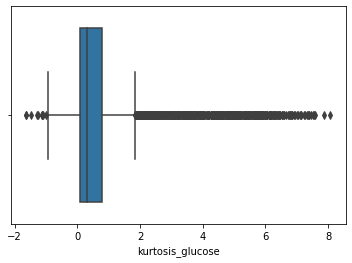

In [424]:
sns.boxplot(train_data['kurtosis_glucose'])

In [425]:
train_data['skewness_oxygen'].max()

1191.0008369999996

In [426]:
train_data['skewness_oxygen'].value_counts().max()

1

c:\users\ivana\cvicenie1\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fnlwgt'>

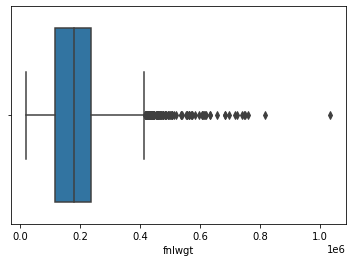

In [427]:
sns.boxplot(train_data['fnlwgt'])

In [428]:
train_data['fnlwgt'].max()

1033222.0

In [429]:
train_data['fnlwgt'].value_counts().max()

4

Na detekovanie zvyšných outlierov použijeme Interquartile Range Method (IRQ). Hodnoty pod našou spodnou hranicou nahradíme hodnotou 5. percentilu a hodnoty nad hornou hranicou nahradíme 95. percentilom. Vytvoríme si na to vlastnú triedu.

In [430]:
class Outliers():
    
    def __init__(self, atributes):
        self.atributes = atributes
        print(atributes)
        
    def fit(self, df, y = None):
        return self
    
    def transform(self, df, y = None):
        for atr in self.atributes:
            self.detect_outliers(atr, df)
        return df
        
    def detect_outliers(self, atr, df):
        print(atr)
        Q1 = np.percentile(df[atr], 25, interpolation = 'midpoint')  
        Q3 = np.percentile(df[atr], 75, interpolation = 'midpoint')  

        print('Q1', Q1)
        print('Q3', Q3)

        
        IQR = Q3 - Q1
        below = Q1-1.5*IQR
        above = Q3+1.5*IQR
        
        Q5 = np.percentile(df[atr], 5, interpolation = 'midpoint')  
        Q95 = np.percentile(df[atr], 95, interpolation = 'midpoint')
        
#         outliers_below = (df[atr]) < below
#         df[outliers_below] = np.nan
#         df[atr].fillna(Q5, inplace=True)

#         outliers_above = (df[atr]) > above
#         df[outliers_above] = np.nan
#         df[atr].fillna(Q95, inplace=True)
        
        df[atr].loc[df[atr] < below] = Q5
        df[atr].loc[df[atr] > above] = Q95


        
        return df

Do poľa outliers si uložíme všetky atribúty, ktorých vychýlené hodnoty chceme upravovať. S využitím pipeline sputíme našu vytvorenú triedu a nahradíme nechcené hodnoty.

In [431]:
outliers = ['kurtosis_glucose', 'skewness_oxygen', 'fnlwgt','age', 'capital_gain', 'capital_loss', 'std_glucose', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen',]

pipelines = Pipeline( steps = [
    ('outliers', Outliers(outliers))
])
    
train_data = pipelines.fit_transform(train_data)

['kurtosis_glucose', 'skewness_oxygen', 'fnlwgt', 'age', 'capital_gain', 'capital_loss', 'std_glucose', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen']
kurtosis_glucose
Q1 0.07214364599999999
Q3 0.776761905
skewness_oxygen
Q1 12.86667887
Q3 127.01200459999998
fnlwgt
Q1 117618.0
Q3 236262.0
age
Q1 44.0
Q3 60.0
capital_gain
Q1 0.0
Q3 0.0
capital_loss
Q1 0.0
Q3 0.0
std_glucose
Q1 39.27939783
Q3 50.94592949
mean_oxygen
Q1 2.065217391
Q3 12.6312709
std_oxygen
Q1 15.04068449
Q3 43.22134994
kurtosis_oxygen
Q1 3.637832862
Q3 10.26158089


c:\users\ivana\cvicenie1\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\ivana\cvicenie1\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\ivana\cvicenie1\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

c:\users\ivana\cvicenie1\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='kurtosis_glucose'>

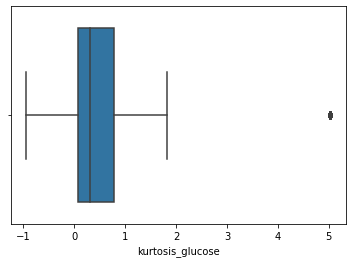

In [432]:
sns.boxplot(train_data['kurtosis_glucose'])

c:\users\ivana\cvicenie1\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fnlwgt'>

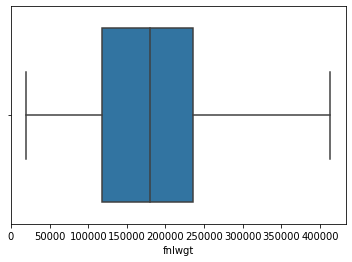

In [433]:
sns.boxplot(train_data['fnlwgt'])

c:\users\ivana\cvicenie1\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

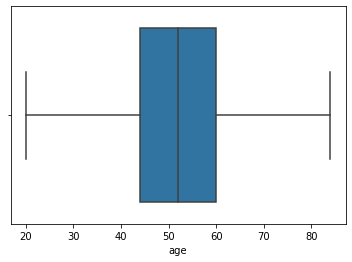

In [434]:
sns.boxplot(train_data['age'])

In [106]:
train_data['fnlwgt'].max()

413297.0

In [107]:
train_data['fnlwgt'].value_counts().max()

108

## Prevedenie kategorických hodnôt na číselné

In [40]:
import category_encoders as ce

In [41]:
categorical_string_columns = ['sex', 'race', 'marital_status', 'occupation', 'relationship', 'education', 'native_country', 'income', 'workclass']

clf = Pipeline(steps=[('onehotencoder', ce.OneHotEncoder(cols=categorical_string_columns))])

In [42]:
train_data = clf.fit_transform(train_data)

c:\users\ivana\cvicenie1\env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [43]:
train_data

,name,address,age,sex_1,sex_2,date_of_birth,race_1,race_2,race_3,race_4,race_5,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,marital_status_6,marital_status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,...,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,hours_per_week,capital_loss,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",62,1,0,1956-11-02,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,40.0,0.0,1,0,0,0,0,0,0,66.311873,77.549955,0.870147,-0.478376
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS 59124",46,1,0,1973-07-04 00:00:00,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,40.0,0.0,0,1,0,0,0,0,0,61.021739,80.095947,0.978639,-0.426168
2,Aaron Gann,"59685 Thomas Extension Apt. 142\r\nFieldsborough, UT 17996",64,0,1,1955-10-01,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,40.0,0.0,1,0,0,0,0,0,0,4.731605,27.308666,6.964347,51.551196
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen, ME 31095",42,1,0,1977-09-27,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,35.0,0.0,0,1,0,0,0,0,0,2.136288,13.809526,9.966755,129.896678
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville, AR 73176",83,1,0,1936-02-23,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,40.0,0.0,1,0,0,0,0,0,0,9.207358,38.488071,4.360677,18.186698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA 31316",65,0,1,1954-10-05,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,35.0,0.0,1,0,0,0,0,0,0,1.753344,18.236376,11.034005,125.782096
3929,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, MA 52118",65,1,0,1954-06-16,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,40.0,0.0,1,0,0,0,0,0,0,107.212375,74.621195,0.115883,-0.819638
3930,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",81,1,0,1938-03-16,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,40.0,0.0,1,0,0,0,0,0,0,129.272575,78.381715,-0.407510,-0.853061
3931,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",63,1,0,1956-03-19,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,28.0,0.0,1,0,0,0,0,0,0,2.276756,14.977893,9.120845,103.876871
